In [1]:
import numpy as np
import pandas as pd
import os
import datetime as dt
import matplotlib as mt
from matplotlib import pyplot as plt 

In [2]:
os.getcwd()

'/Users/abhishek/Desktop/Python Data/4. Pandas Case Study 2 - Credit Card Case Study'

In [10]:
#File = pd.ExcelFile('/Users/abhishek/Desktop/Python Data/4. Pandas Case Study 2 - Credit Card Case Study/Credit Card Data copy.xlsx')
#File.sheet_names
#Customer_acq = File.parse(sheet_name="Customer Acqusition")
#Couldn't use as the Age are generated Randomly in Source Data

In [3]:
Customer_acq = pd.read_csv('/Users/abhishek/Desktop/Python Data/4. Pandas Case Study 2 - Credit Card Case Study/Customer Acqusition copy.csv')

In [4]:
Customer_acq.dtypes

No            int64
Customer     object
Age           int64
City         object
Product      object
Limit       float64
Company      object
Segment      object
dtype: object

In [5]:
Customer_acq.isnull().sum()

No          0
Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [6]:
Customer_acq

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [7]:
Spend = pd.read_csv('/Users/abhishek/Desktop/Python Data/4. Pandas Case Study 2 - Credit Card Case Study/spend copy 2.csv')

In [8]:
Spend.dtypes

Sl No:        int64
Customer     object
Month        object
Type         object
Amount      float64
dtype: object

In [9]:
Spend.isnull().sum()

Sl No:      0
Customer    0
Month       0
Type        0
Amount      0
dtype: int64

In [10]:
Spend

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...
1495,1496,A67,4-Feb-06,BUS TICKET,356872.73
1496,1497,A68,25-Mar-06,BUS TICKET,204971.10
1497,1498,A69,31-Mar-06,BUS TICKET,50449.44
1498,1499,A70,23-Mar-06,BUS TICKET,80593.94


In [11]:
Repay = pd.read_csv('/Users/abhishek/Desktop/Python Data/4. Pandas Case Study 2 - Credit Card Case Study/Repayment copy.csv')

In [12]:
Repay.dtypes

SL No:        float64
Customer       object
Month          object
Amount        float64
Unnamed: 4    float64
dtype: object

In [13]:
Repayment = Repay.iloc[0:1500,[0,1,2,3]]

In [14]:
Repayment

,SL No:,Customer,Month,Amount
0,NaN,A1,12-Jan-04,495414.75
1,2.0,A1,3-Jan-04,245899.02
2,3.0,A1,15-Jan-04,259490.06
3,4.0,A1,25-Jan-04,437555.12
4,5.0,A1,17-Jan-05,165972.88
...,...,...,...,...
1495,1496.0,A67,9-May-05,55638.77
1496,1497.0,A68,10-May-06,319836.49
1497,1498.0,A69,11-Jul-06,247628.45
1498,1499.0,A70,12-Aug-05,454016.51


In [15]:
Repayment.isnull().sum()

SL No:      1
Customer    0
Month       0
Amount      0
dtype: int64

## 1. In the above dataset,
   - a. In case age is less than 18, replace it with mean of age values.

In [17]:
Customer_acq.Age[Customer_acq.Age<18] = Customer_acq.Age.mean()

In [18]:
Customer_acq.Age.iloc[15]

52.0

## b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.
 - (customer’s limit provided in acquisition table is the per transaction limit on his car

In [19]:
Cust_Spend_Limit = pd.merge(left = Customer_acq,right= Spend, on="Customer", how = "inner", indicator=True)
Cust_Spend_Limit.head(22)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,_merge
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,both
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,both
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46,both
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47,both
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07,both
5,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,6,23-Feb-05,SANDALS,168285.60,both
6,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,7,1-Feb-05,CAR,23370.20,both
7,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,103,12-Jan-04,TRAIN TICKET,440563.22,both
8,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,117,5-Feb-04,BUS TICKET,52208.65,both
9,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,131,19-Apr-06,AIR TICKET,346925.68,both


In [20]:
Cust_Spend_Limit.Amount = pd.Series(np.where(Cust_Spend_Limit.Amount>Cust_Spend_Limit.Limit,Cust_Spend_Limit.Limit*50/100,Cust_Spend_Limit.Amount))

In [21]:
Cust_Spend_Limit.head(22)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,_merge
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,both
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,both
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46,both
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47,both
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07,both
5,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,6,23-Feb-05,SANDALS,168285.60,both
6,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,7,1-Feb-05,CAR,23370.20,both
7,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,103,12-Jan-04,TRAIN TICKET,440563.22,both
8,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,117,5-Feb-04,BUS TICKET,52208.65,both
9,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,131,19-Apr-06,AIR TICKET,346925.68,both


### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [31]:
#Cust_Repay_Limit = pd.merge(left = Customer_acq,right=Repayment,on = "Customer",how = "inner", indicator = True)

In [32]:
#Cust_Repay_Limit

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount,_merge
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,NaN,12-Jan-04,495414.75,both
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,3-Jan-04,245899.02,both
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3.0,15-Jan-04,259490.06,both
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4.0,25-Jan-04,437555.12,both
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5.0,17-Jan-05,165972.88,both
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98.0,25-Jan-04,310992.30,both
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99.0,12-Jan-04,121874.90,both
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100.0,3-Jan-04,337815.57,both
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101.0,15-Jan-04,25682.73,both


In [33]:
#Cust_Repay_Limit.Amount = pd.Series(np.where(Cust_Repay_Limit.Amount > Cust_Repay_Limit.Limit,Cust_Repay_Limit.Limit,Cust_Repay_Limit.Amount))

In [22]:
Cust_Complete = pd.merge(left=Cust_Spend_Limit,right= Repayment,on = "Customer", how = "inner")

In [23]:
Cust_Complete

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_x,Type,Amount_x,_merge,SL No:,Month_y,Amount_y
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,both,NaN,12-Jan-04,495414.75
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,both,2.0,3-Jan-04,245899.02
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,both,3.0,15-Jan-04,259490.06
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,both,4.0,25-Jan-04,437555.12
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,both,5.0,17-Jan-05,165972.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37279,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66,both,98.0,25-Jan-04,310992.30
37280,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,5000.00,both,99.0,12-Jan-04,121874.90
37281,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,5000.50,both,100.0,3-Jan-04,337815.57
37282,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,5001.00,both,101.0,15-Jan-04,25682.73


In [24]:
Cust_Complete.Amount_y[Cust_Complete.Amount_y>Cust_Complete.Limit]

324      185955.07
325      412783.34
326      148038.67
327      179144.68
329      381635.66
           ...    
37270    462283.02
37279    310992.30
37280    121874.90
37281    337815.57
37282     25682.73
Name: Amount_y, Length: 13848, dtype: float64

In [25]:
Cust_Complete.Amount_y= pd.Series(np.where(Cust_Complete.Amount_y > Cust_Complete.Limit,Cust_Complete.Limit,Cust_Complete.Amount_y))
Cust_Complete.iloc[324]

No                     2
Customer              A2
Age                   71
City            CALCUTTA
Product           Silver
Limit             100000
Company               C2
Segment     Salaried_MNC
Sl No:               104
Month_x         3-Jan-04
Type              RENTAL
Amount_x           50000
_merge              both
SL No:               104
Month_y         3-Jan-04
Amount_y          100000
Name: 324, dtype: object

## 2. From the above dataset create the following summaries:

### a. How many distinct customers exist?
 - 100 Distinct Customers Exist

In [26]:
Cust_Complete.Customer[-(Cust_Complete.Customer.duplicated())]

0          A1
324        A2
445        A3
566        A4
687        A5
         ... 
37279     A96
37280     A97
37281     A98
37282     A99
37283    A100
Name: Customer, Length: 100, dtype: object

### b. How many distinct categories exist?

### c. What is the average monthly spend by customers?

In [27]:
Cust_Complete.Month_x = pd.to_datetime(Cust_Complete.Month_x)
Cust_Complete.Month_y = pd.to_datetime(Cust_Complete.Month_y)
Cust_Complete.dtypes

No                   int64
Customer            object
Age                float64
City                object
Product             object
Limit              float64
Company             object
Segment             object
Sl No:               int64
Month_x     datetime64[ns]
Type                object
Amount_x           float64
_merge            category
SL No:             float64
Month_y     datetime64[ns]
Amount_y           float64
dtype: object

In [28]:
Cust_Complete = Cust_Complete.assign(Month_No_X = Cust_Complete.Month_x.dt.month)
Cust_Complete = Cust_Complete.assign(Month_No_Y = Cust_Complete.Month_y.dt.month)

In [29]:
Cust_Complete.head(5)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_x,Type,Amount_x,_merge,SL No:,Month_y,Amount_y,Month_No_X,Month_No_Y
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.8,both,NaN,2004-01-12,495414.75,1,1
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.8,both,2.0,2004-01-03,245899.02,1,1
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.8,both,3.0,2004-01-15,259490.06,1,1
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.8,both,4.0,2004-01-25,437555.12,1,1
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.8,both,5.0,2005-01-17,165972.88,1,1


In [30]:
Cust_Complete = Cust_Complete.assign(Year_X = Cust_Complete.Month_x.dt.year)
Cust_Complete = Cust_Complete.assign(Year_Y = Cust_Complete.Month_y.dt.year)

In [31]:
Cust_Complete.head(5)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_x,Type,Amount_x,_merge,SL No:,Month_y,Amount_y,Month_No_X,Month_No_Y,Year_X,Year_Y
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.8,both,NaN,2004-01-12,495414.75,1,1,2004,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.8,both,2.0,2004-01-03,245899.02,1,1,2004,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.8,both,3.0,2004-01-15,259490.06,1,1,2004,2004
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.8,both,4.0,2004-01-25,437555.12,1,1,2004,2004
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.8,both,5.0,2005-01-17,165972.88,1,1,2004,2005


In [32]:
Average_Monthly_Spend_Customer = Cust_Complete.groupby(by = ["Customer","Year_X","Month_No_X"])[["Amount_x"]].mean().add_prefix("Average_Spend_")

In [33]:
Average_Monthly_Spend_Customer.head(3)

Average_Spend_Amount_x
Customer Year_X Month_No_X                        
A1       2004   1                    373274.006667
                2                     52208.650000
                5                    361141.310000

### d. What is the average monthly repayment by customers?

In [34]:
Average_Monthly_Repayment_Customer = Cust_Complete.groupby(by = ["Customer","Year_Y","Month_No_Y"])[["Amount_y"]].mean().add_prefix("Average_Repayment_")

In [35]:
Average_Monthly_Repayment_Customer.head(3)

Average_Repayment_Amount_y
Customer Year_Y Month_No_Y                            
A1       2004   1                        373638.901667
                2                        117964.430000
         2005   1                        165972.880000

##### e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [36]:
Monthly_Spend = Cust_Complete.groupby(by = ["Year_X","Month_No_X"])[["Amount_x"]].sum()
Monthly_Repayment = Cust_Complete.groupby(by = ["Year_Y","Month_No_Y"])[["Amount_y"]].sum()

In [37]:
Monthly_Repayment.columns

Index(['Amount_y'], dtype='object')

In [38]:
Monthly_Spend.head(1)

,,Amount_x
Year_X,Month_No_X,
2004,1,1.143343e+09


In [39]:
Monthly_Profit = Monthly_Repayment.Amount_y - Monthly_Spend.Amount_x

In [40]:
Monthly_Profit.head(8)

Year_Y  Month_No_Y
2004    1             5.657708e+06
        2            -2.141429e+07
        3             1.569224e+07
        4             7.094865e+07
        5             3.533218e+07
        9            -9.457796e+06
        11            1.755948e+07
2005    1            -1.016287e+07
dtype: float64

In [41]:
Profit_MonthWise = pd.Series(np.where(Monthly_Profit>0,Monthly_Profit*2.9/100,"No_Profit"))

#### f.What are the top 5 product type
- Top 5 Product are
  - Camera
  - Petro
  - Food
  - Air Ticket
  - Train Ticket

In [42]:
Product_Type = Cust_Complete.Type[-(Cust_Complete.Type.duplicated())]

In [43]:
Product_Amount_Spend = Cust_Complete.groupby(by = ["Type"])[["Amount_x"]].sum().add_prefix("AmountSpend_")

In [44]:
Product_Amount_Spend = Product_Amount_Spend.sort_values(by = "AmountSpend_Amount_x", ascending=False)

In [45]:
Top5_ProductType = Product_Amount_Spend.head(5)

In [46]:
Top5_ProductType

,AmountSpend_Amount_x
Type,
CAMERA,7.517011e+08
PETRO,7.071549e+08
FOOD,5.478835e+08
AIR TICKET,5.401180e+08
TRAIN TICKET,5.344239e+08


#### g.Which City have Maximum Spend
 - Cochin have the maximum spend

In [47]:
City = Cust_Complete.City[-(Cust_Complete.City.duplicated())]
City

0         BANGALORE
324        CALCUTTA
445          COCHIN
566          BOMBAY
976           DELHI
1554          PATNA
1878        CHENNAI
13956    TRIVANDRUM
Name: City, dtype: object

In [48]:
CityWise_Spend = Cust_Complete.groupby(by = "City")[["Amount_x"]].sum().add_prefix("CityWise_")
CityWise_Spend
TopCity_SpendWise = CityWise_Spend.sort_values(by = "CityWise_Amount_x", ascending = False)
TopCity_SpendWise.head(1)

,CityWise_Amount_x
City,
COCHIN,1.175903e+09


#### h. Which age group is spending more money?
- Minimum Age = 19
- Maximum Age = 79
- Youth = 19 - 25
- Adult = 26 - 59
- Senior Citizens = 60-79
- Adult are spending more amount

In [49]:
Age = Cust_Complete.Age[-(Cust_Complete.Age.duplicated())].sort_values()

In [50]:
Age = Age.astype(int)
Age
Cust_Complete= Cust_Complete.assign(Age_Category = np.where((Cust_Complete.Age >= 19) & (Cust_Complete.Age <= 25),"Youth",(np.where((Cust_Complete.Age >= 26) & (Cust_Complete.Age <= 59),"Adult","Senior_Citizen"))))

In [224]:
#Age_Category = np.where((Age >= 19) & (Age <= 25),"Youth",(np.where((Age >= 26) & (Age <= 59),"Adult","Senior_Citizen")))

In [51]:
Cust_Complete

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_x,...,Amount_x,_merge,SL No:,Month_y,Amount_y,Month_No_X,Month_No_Y,Year_X,Year_Y,Age_Category
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,...,485470.80,both,NaN,2004-01-12,495414.75,1,1,2004,2004,Senior_Citizen
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,...,485470.80,both,2.0,2004-01-03,245899.02,1,1,2004,2004,Senior_Citizen
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,...,485470.80,both,3.0,2004-01-15,259490.06,1,1,2004,2004,Senior_Citizen
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,...,485470.80,both,4.0,2004-01-25,437555.12,1,1,2004,2004,Senior_Citizen
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,...,485470.80,both,5.0,2005-01-17,165972.88,1,1,2004,2005,Senior_Citizen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37279,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,2004-01-25,...,54729.66,both,98.0,2004-01-25,100000.00,1,1,2004,2004,Adult
37280,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,2004-01-12,...,5000.00,both,99.0,2004-01-12,10000.00,1,1,2004,2004,Adult
37281,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,2004-01-03,...,5000.50,both,100.0,2004-01-03,10001.00,1,1,2004,2004,Adult
37282,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,2004-01-15,...,5001.00,both,101.0,2004-01-15,10002.00,1,1,2004,2004,Adult


In [52]:
Age_Group_Speding = Cust_Complete.groupby(by = "Age_Category")[["Amount_x"]].sum().add_prefix("AgeWiseSpending")

In [53]:
Top_Group = Age_Group_Speding.sort_values(by = "AgeWiseSpendingAmount_x", ascending = False)

In [54]:
Top_Group

,AgeWiseSpendingAmount_x
Age_Category,
Adult,3.986677e+09
Senior_Citizen,1.117700e+09
Youth,6.436101e+08


#### i.Who are the top 10 customers in terms of repayment?
- A61,A60,A13,A43,A45,A12,A14,A44,A39,A42

In [55]:
#Customer = Cust_Complete.loc[:,["Customer","Amount_y"]]
Customer = Cust_Complete.groupby(by = "Customer")[["Amount_y"]].sum().add_prefix("Repayment_")

In [56]:
Top10_Customers = Customer.sort_values(by = "Repayment_Amount_y", ascending = False).head(10)
Top10_Customers

,Repayment_Amount_y
Customer,
A61,4.004874e+08
A60,3.752990e+08
A13,2.967320e+08
A43,2.631860e+08
A45,2.618984e+08
A12,2.583776e+08
A14,2.462413e+08
A44,2.400866e+08
A39,2.362970e+08


#### Q3.  Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [58]:
City_Wise_Spend = Cust_Complete.groupby(by=["City","Product","Year_X"])[["Amount_x"]].sum().add_prefix("CityWiseSpend_")

In [59]:
City_Wise_Spend.head(1)

,,,CityWiseSpend_Amount_x
City,Product,Year_X,
BANGALORE,Gold,2004,2.480069e+08


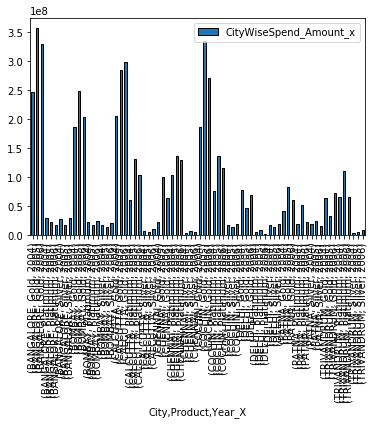

In [60]:
City_Wise_Spend.plot(kind = "bar",edgecolor = "black")
plt.show()

In [61]:
City_Wise_Spend1 = Cust_Complete.groupby(by=["City","Product","Year_X"])[["Amount_x"]].sum().add_prefix("CityWiseSpend_").reset_index()

In [62]:
City_Wise_Spend1.head(1)

,City,Product,Year_X,CityWiseSpend_Amount_x
0,BANGALORE,Gold,2004,2.480069e+08


In [63]:
City_Wise_Spend1_Wide = City_Wise_Spend1.pivot_table(index = ["City","Year_X"],columns="Product",values = "CityWiseSpend_Amount_x")

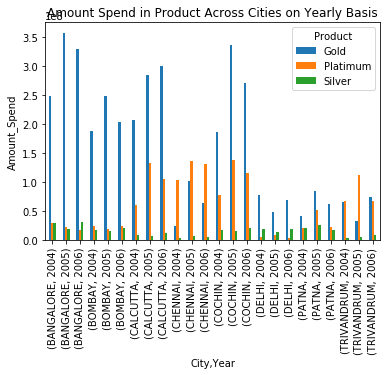

In [64]:
City_Wise_Spend1_Wide.plot(kind = "bar")
plt.xlabel("City,Year")
plt.ylabel("Amount_Spend")
plt.title("Amount Spend in Product Across Cities on Yearly Basis")
plt.show()

In [65]:
Cust_Complete = Cust_Complete.drop(columns=["_merge"])
Cust_Complete = Cust_Complete.drop(columns=["Sl No:"])
Cust_Complete = Cust_Complete.drop(columns=["SL No:"])

#### 4. Create graphs for
- a. Monthly comparison of total spends, city wise

In [66]:
Monthly_Comparison = Cust_Complete.groupby(by=["City","Month_No_X"])[["Amount_x"]].sum().add_prefix("MonthlySpend_").reset_index()
Monthly_Comparison

,City,Month_No_X,MonthlySpend_Amount_x
0,BANGALORE,1,2.308396e+08
1,BANGALORE,2,1.808167e+08
2,BANGALORE,3,1.478226e+08
3,BANGALORE,4,1.088377e+08
4,BANGALORE,5,1.842610e+08
...,...,...,...
91,TRIVANDRUM,8,1.346699e+07
92,TRIVANDRUM,9,5.767975e+06
93,TRIVANDRUM,10,7.710712e+06
94,TRIVANDRUM,11,3.622461e+06


In [67]:
Monthly_Comparison = Monthly_Comparison.pivot_table(index = "Month_No_X",columns="City",values="MonthlySpend_Amount_x")

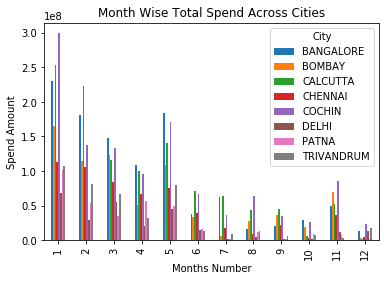

In [68]:
Monthly_Comparison.plot(kind = "bar")
plt.title("Month Wise Total Spend Across Cities")
plt.xlabel("Months Number")
plt.ylabel("Spend Amount")
plt.show()

#### b. Comparison of yearly spend on air tickets

In [69]:
Cust_Complete.head(6)

,No,Customer,Age,City,Product,Limit,Company,Segment,Month_x,Type,Amount_x,Month_y,Amount_y,Month_No_X,Month_No_Y,Year_X,Year_Y,Age_Category
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-12,495414.75,1,1,2004,2004,Senior_Citizen
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-03,245899.02,1,1,2004,2004,Senior_Citizen
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-15,259490.06,1,1,2004,2004,Senior_Citizen
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-25,437555.12,1,1,2004,2004,Senior_Citizen
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2005-01-17,165972.88,1,1,2004,2005,Senior_Citizen
5,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2005-02-23,365366.62,1,2,2004,2005,Senior_Citizen


In [70]:
Air_Ticket = Cust_Complete.loc[Cust_Complete.Type == "AIR TICKET"]
Air_Ticket

,No,Customer,Age,City,Product,Limit,Company,Segment,Month_x,Type,Amount_x,Month_y,Amount_y,Month_No_X,Month_No_Y,Year_X,Year_Y,Age_Category
162,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2006-04-19,AIR TICKET,346925.68,2004-01-12,495414.75,4,1,2006,2004,Senior_Citizen
163,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2006-04-19,AIR TICKET,346925.68,2004-01-03,245899.02,4,1,2006,2004,Senior_Citizen
164,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2006-04-19,AIR TICKET,346925.68,2004-01-15,259490.06,4,1,2006,2004,Senior_Citizen
165,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2006-04-19,AIR TICKET,346925.68,2004-01-25,437555.12,4,1,2006,2004,Senior_Citizen
166,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2006-04-19,AIR TICKET,346925.68,2005-01-17,165972.88,4,1,2006,2005,Senior_Citizen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37258,75,A75,36.0,BOMBAY,Silver,100003.0,C37,Self Employed,2005-02-23,AIR TICKET,50001.50,2005-02-23,100003.00,2,2,2005,2005,Adult
37259,76,A76,66.0,BANGALORE,Silver,500000.0,C38,Self Employed,2005-02-03,AIR TICKET,30066.44,2005-02-03,265619.05,2,2,2005,2005,Senior_Citizen
37260,77,A77,35.0,BANGALORE,Silver,500000.0,C39,Self Employed,2006-02-04,AIR TICKET,31048.93,2006-02-04,3159.62,2,2,2006,2006,Adult
37267,84,A84,70.0,PATNA,Silver,100000.0,C7,Govt,2006-03-27,AIR TICKET,50000.00,2006-03-27,100000.00,3,3,2006,2006,Senior_Citizen


In [71]:
AirSpend = Air_Ticket.groupby(by=["Year_X","Type"])[["Amount_x"]].sum().add_prefix("YearlySpend_").reset_index()
AirSpend

,Year_X,Type,YearlySpend_Amount_x
0,2004,AIR TICKET,1.126823e+08
1,2005,AIR TICKET,2.878031e+08
2,2006,AIR TICKET,1.396326e+08


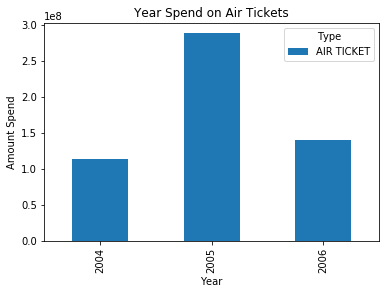

In [72]:
AirSpend1 = AirSpend.pivot_table(index = "Year_X",columns="Type",values = "YearlySpend_Amount_x")
AirSpend1.plot(kind = "bar")
plt.title("Year Spend on Air Tickets")
plt.xlabel("Year")
plt.ylabel("Amount Spend")
plt.show()

#### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)
- The Products are used more during the 1st quater of the year,there is less usage in the 3rd quater and during the 11th month of the year the product usage rate is more

In [73]:
Product_Seasonality = Cust_Complete.groupby(by = ["Product","Month_No_X"])[["Amount_x"]].sum().add_prefix("Monthly_Spend_")

In [74]:
Product_Seasonality
Product_Seasonality1 = Product_Seasonality.reset_index()
Product_Seasonality1

,Product,Month_No_X,Monthly_Spend_Amount_x
0,Gold,1,8.507658e+08
1,Gold,2,6.330246e+08
2,Gold,3,5.096947e+08
3,Gold,4,3.513289e+08
4,Gold,5,5.961399e+08
5,Gold,6,1.910250e+08
6,Gold,7,1.492207e+08
7,Gold,8,1.351418e+08
8,Gold,9,1.124056e+08
9,Gold,10,8.608922e+07


In [75]:
Product_Seasonality1 = Product_Seasonality1.pivot_table(index = "Product", columns ="Month_No_X", values= "Monthly_Spend_Amount_x")

In [76]:
Product_Seasonality1

Month_No_X,1,2,3,4,5,6,7,8,9,10,11,12
Product,,,,,,,,,,,,
Gold,8.507658e+08,6.330246e+08,5.096947e+08,3.513289e+08,5.961399e+08,1.910250e+08,1.492207e+08,1.351418e+08,1.124056e+08,86089221.41,2.295267e+08,56003027.04
Platimum,3.919087e+08,2.516036e+08,1.942044e+08,1.332545e+08,2.119807e+08,8.224614e+07,3.586312e+07,4.622154e+07,4.432547e+07,13368895.18,7.011844e+07,15073981.25
Silver,9.640803e+07,4.108076e+07,5.708925e+07,4.498365e+07,4.555483e+07,1.876807e+07,1.311412e+07,7.374588e+06,9.605663e+06,1950028.50,1.641553e+07,5107853.22


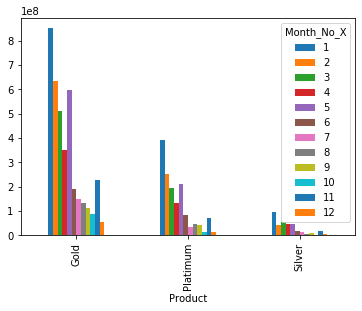

In [77]:
Product_Seasonality1.plot(kind="bar")
plt.show()